# Credit Risk Unsupervised Classification

## Import packages 

In [399]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
sns.set_style('darkgrid')
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

## Import dataset 

### 1. Import dataset without label

In [400]:
df = pd.read_csv('german_credit_data.csv')
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


### 2. Import dataset and extract label

In [301]:
dr = pd.read_csv("german_credit_data_with_target.csv")
for col in ["Risk"]:
    le = LabelEncoder()
    le.fit(dr[col])
    dr[col] = le.transform(dr[col])
risk = dr["Risk"]
risk

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [302]:
def SC_LabelEncoder(text):
    if text == "Good":
        return 0
    elif text == "Bad":
        return 1

risk = risk.apply(SC_LabelEncoder)
risk.head(10)

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: Risk, dtype: object

In [303]:
db = df.drop('Unnamed: 0',axis=1)
db.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


Delete column called "Unnamed: 0" since it doesn't represent any kind of usefull information

In [304]:
db.isna()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,True,False,False,False
998,False,False,False,False,False,False,False,False,False


There are some NAs inside the dataset 

In [305]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [306]:
def SC_LabelEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

db["Saving accounts"] = db["Saving accounts"].apply(SC_LabelEncoder)
db["Checking account"] = db["Checking account"].apply(SC_LabelEncoder)

def H_LabelEncoder(text):
    if text == "free":
        return 0
    elif text == "rent":
        return 1
    elif text == "own":
        return 2

db["Housing"] = db["Housing"].apply(H_LabelEncoder)

def H_LabelEncoder(text):
    if text == "male":
        return 0
    elif text == "female":
        return 1

db["Sex"] = db["Sex"].apply(H_LabelEncoder)

for col in ["Purpose"]:
    le = LabelEncoder()
    le.fit(db[col])
    db[col] = le.transform(db[col])
    
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null int64
Job                 1000 non-null int64
Housing             1000 non-null int64
Saving accounts     1000 non-null int64
Checking account    1000 non-null int64
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null int64
dtypes: int64(9)
memory usage: 70.4 KB


In [307]:
db.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,0,2,2,0,1,1169,6,5
1,22,1,2,2,1,2,5951,48,5
2,49,0,1,2,1,0,2096,12,3
3,45,0,2,0,1,1,7882,42,4
4,53,0,2,0,1,1,4870,24,1
5,35,0,1,0,0,0,9055,36,3
6,53,0,2,2,3,0,2835,24,4
7,35,0,3,1,1,2,6948,36,1
8,61,0,1,2,4,0,3059,12,5
9,28,0,3,2,1,2,5234,30,1


Encoded each categorical variables and put 0 instead of NAs within each column

## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Credit distribution by Age')

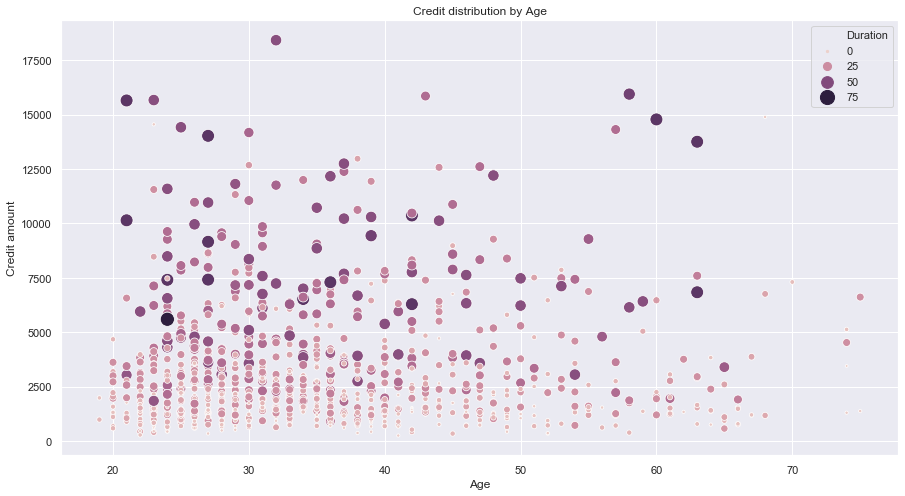

In [308]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=db, x="Age", y="Credit amount",hue = 'Duration', size = 'Duration',sizes=(5, 200)).set_title("Credit distribution by Age")

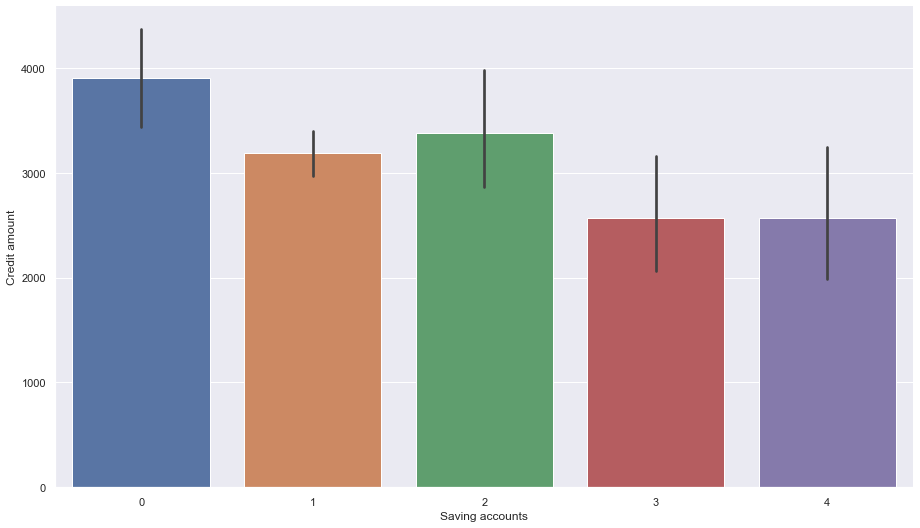

In [309]:
h = sns.catplot(data=db, x="Saving accounts", y="Credit amount", kind="bar")
h.fig.set_figwidth(15)
h.fig.set_figheight(8)

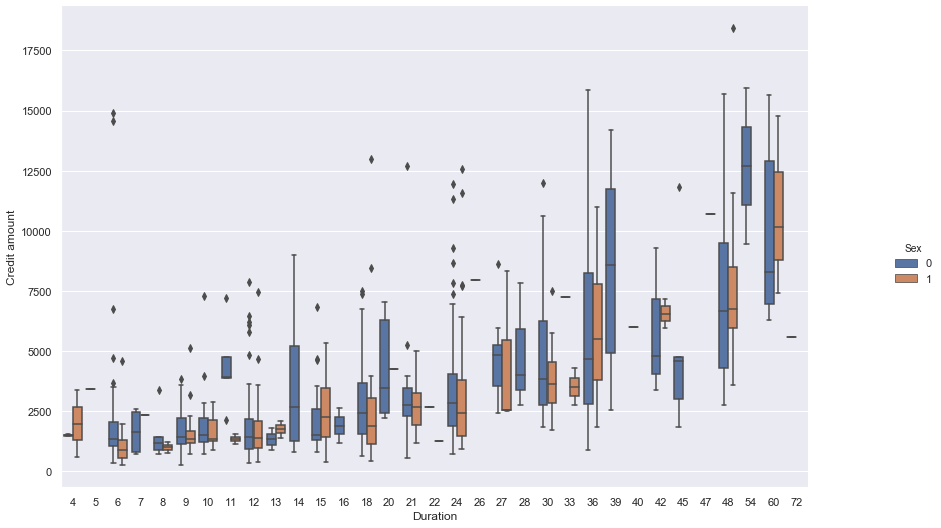

In [310]:
g = sns.catplot(x="Duration", y="Credit amount", hue="Sex",
            kind="box", data=db)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

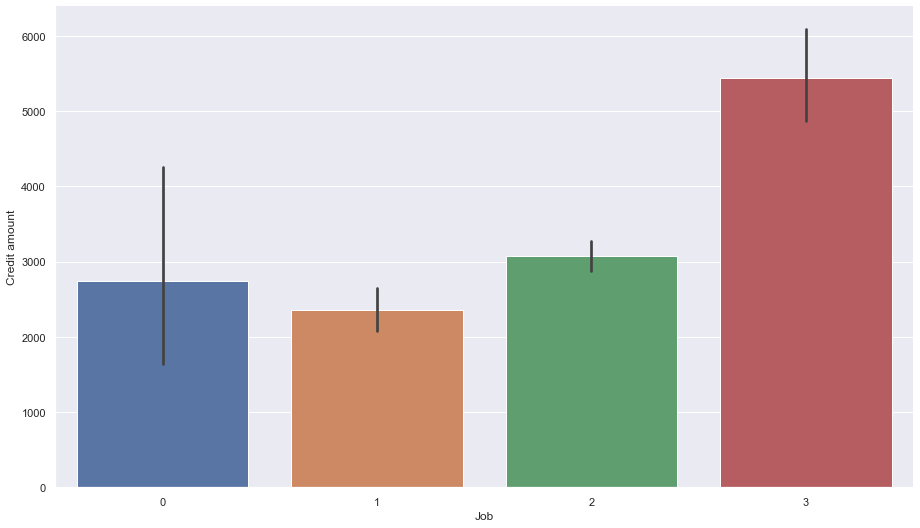

In [311]:
i = sns.catplot(data=db, x="Job", y="Credit amount", kind="bar")
i.fig.set_figwidth(15)
i.fig.set_figheight(8)

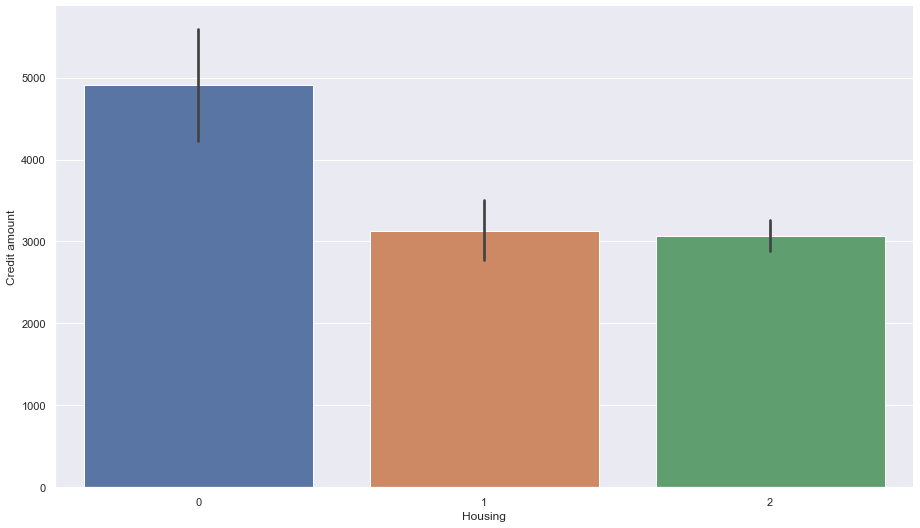

In [312]:
j = sns.catplot(data=db, x="Housing", y="Credit amount", kind="bar")
j.fig.set_figwidth(15)
j.fig.set_figheight(8)

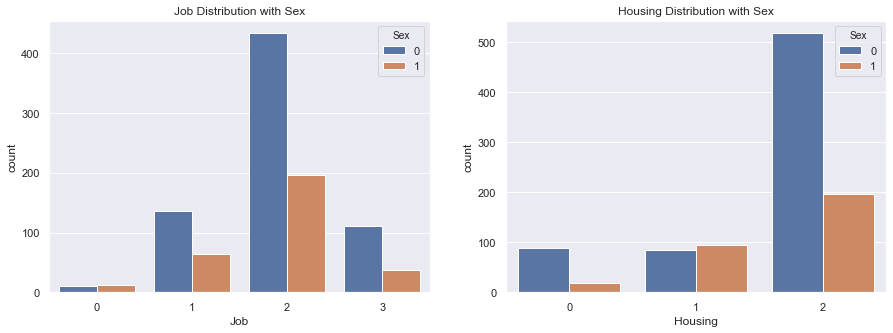

In [313]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=db, x="Job", hue="Sex", ax=ax[0]).set_title("Job Distribution with Sex");
sns.countplot(data=db, x="Housing", hue="Sex", ax=ax[1]).set_title("Housing Distribution with Sex");


## Correlation

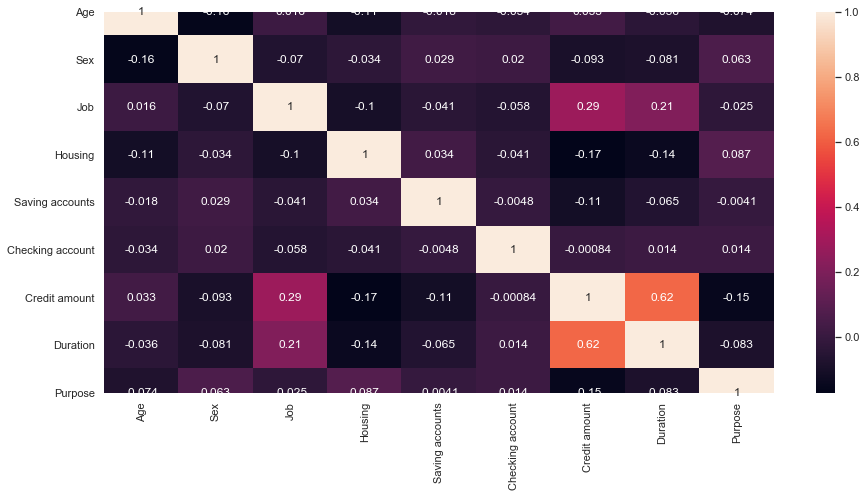

In [314]:
f, ax = plt.subplots(figsize=(15, 7))
corrMatrix = db.corr()
ax = sns.heatmap(corrMatrix,annot=True)
plt.show()

## Machine Learning

### 1. Clustering with K = 4

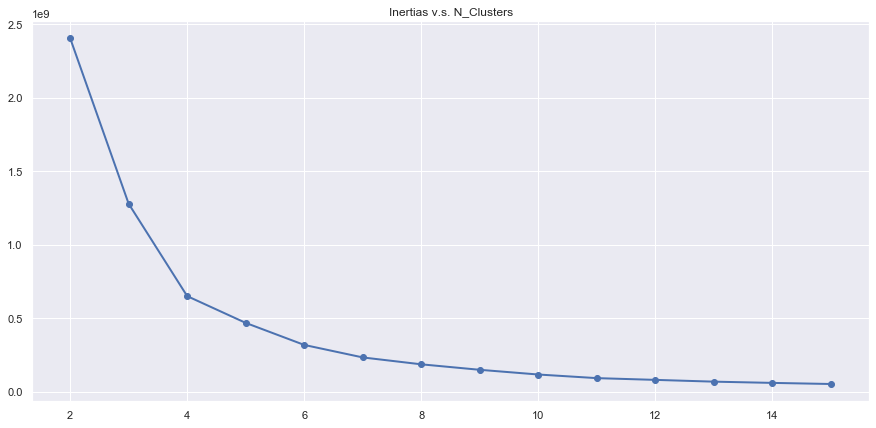

In [315]:
inertias = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(db)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(15,7))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

In [316]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(db)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


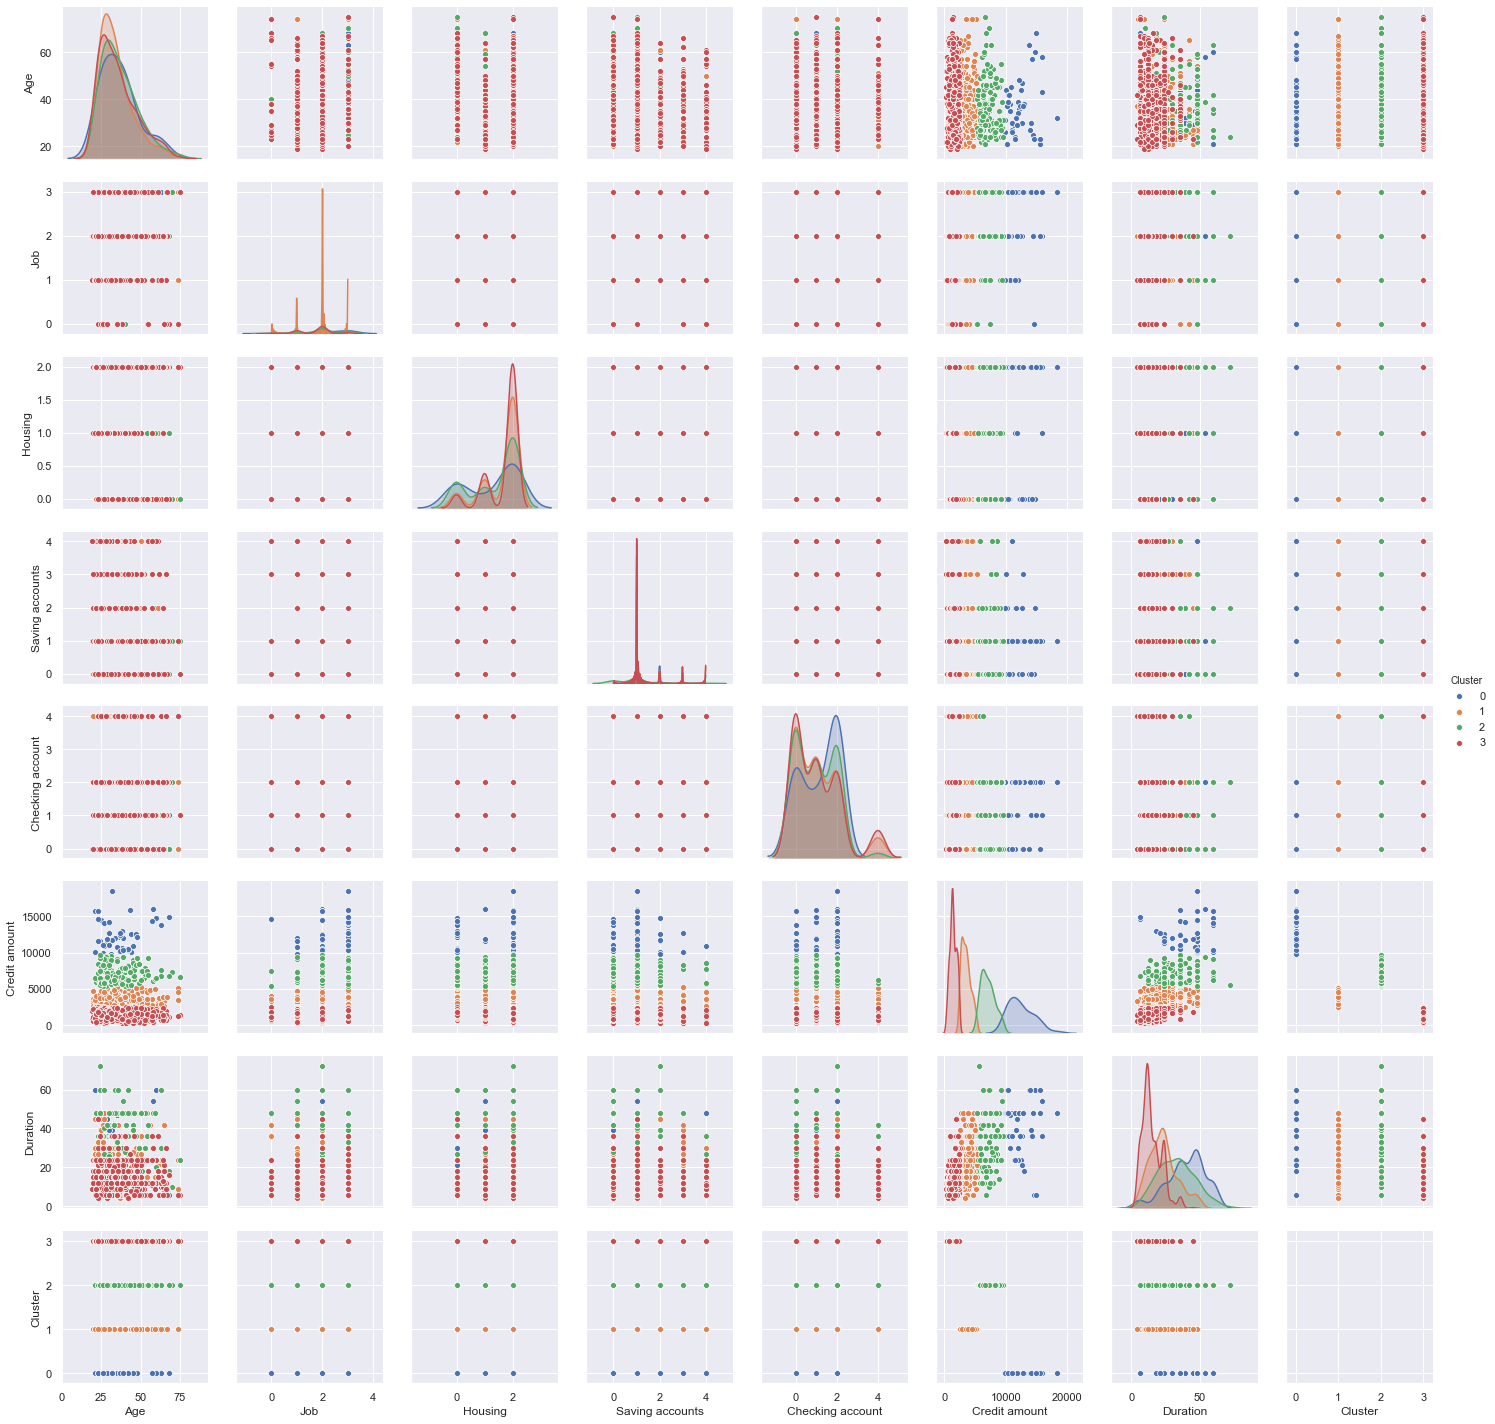

In [207]:
df_clustered = db[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['Age', 'Job', 'Housing', 'Saving accounts', 
                 'Checking account', 'Credit amount', 'Duration', "Cluster"]], hue="Cluster");

### 2. Clustering with K = 2

In [209]:
km = KMeans(n_clusters=2, random_state=0)
clusters = km.fit_predict(db)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


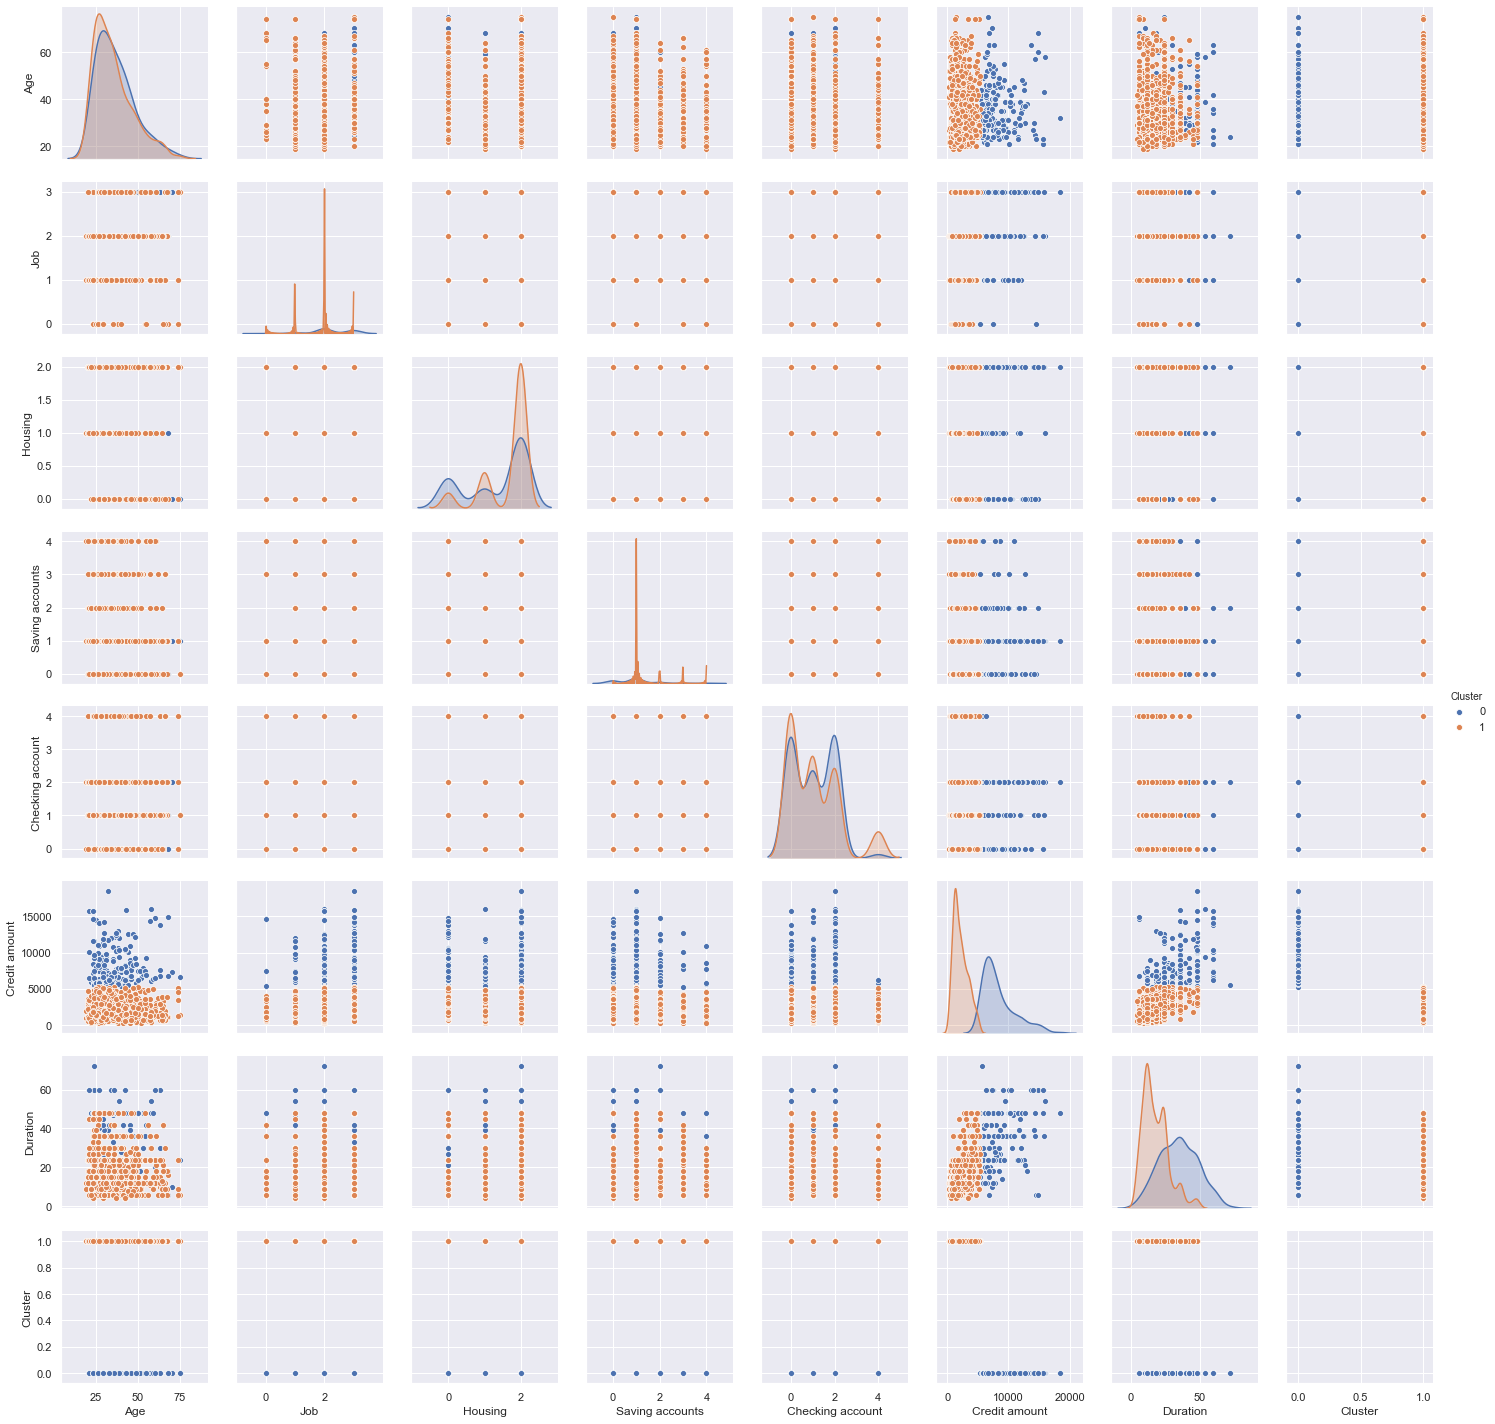

In [211]:
df_clustered = db[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['Age', 'Job', 'Housing', 'Saving accounts', 
                 'Checking account', 'Credit amount', 'Duration', "Cluster"]], hue="Cluster");

In [228]:
display(Markdown("In encoded Risk column, good = 1 and bad = 0, but the predicted clusters 0 and 1 does not have the same meaning. Thus, whether the predicted clusters is equal or opposite to the given risk, the higher TRUE percentage will be the accuracy rate."))
acc = max((sum(clusters == risk) / len(df)), (sum(clusters != risk) / len(db)))
display(Markdown("The accuracy rate of 2-Means clustering is " + str(acc)))

In encoded Risk column, good = 1 and bad = 0, but the predicted clusters 0 and 1 does not have the same meaning. Thus, whether the predicted clusters is equal or opposite to the given risk, the higher TRUE percentage will be the accuracy rate.

The accuracy rate of 2-Means clustering is 0.671

### 3. KNN

In [401]:
X = db
y = risk
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=0)

In [275]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    score = accuracy_score(y_test, neigh.predict(x_test))
    if score > max_score:
        max_k = k
        max_score = score

display(Markdown("number of k equal to " + str(max_k) + " accuracy equal to " + str(max_score)))

number of k equal to 42 accuracy equal to 0.72

### 4. Ensemble Model

>lr 0.687 (0.026)
>knn 0.669 (0.052)
>cart 0.665 (0.037)
>svm 0.709 (0.020)
>bayes 0.697 (0.037)


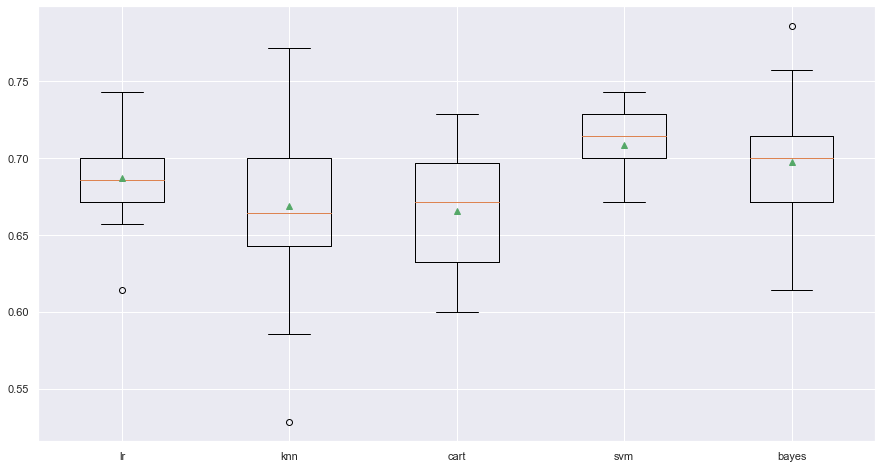

In [390]:
def get_stacking():
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	level1 = LogisticRegression()
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models
 
def evaluate_model(model, x_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
models = get_models()
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.687 (0.026)
>knn 0.669 (0.052)
>cart 0.655 (0.048)
>svm 0.709 (0.020)
>bayes 0.697 (0.037)
>stacking 0.711 (0.028)


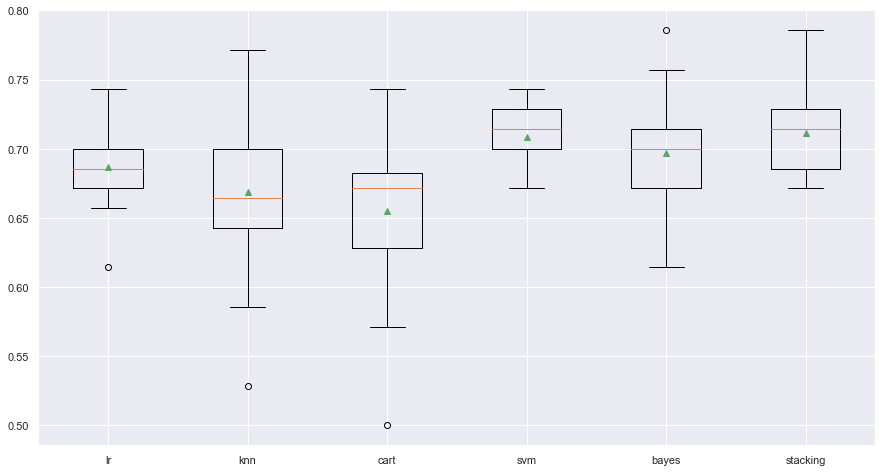

In [391]:
def get_stacking():
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	level1 = LogisticRegression()
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
def evaluate_model(model, x_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

models = get_models()
results, names = list(), list()

for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [392]:
mfit = model.fit(x_train, y_train)
yhat = model.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Confusion matrix, without normalization
[[ 23  63]
 [ 11 203]]
Normalized confusion matrix
[[0.26744186 0.73255814]
 [0.05140187 0.94859813]]


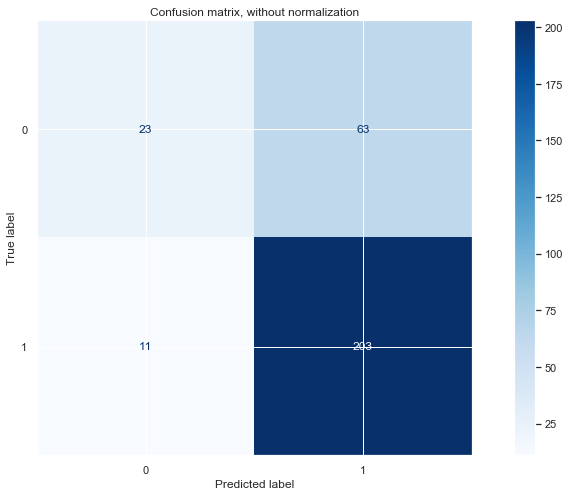

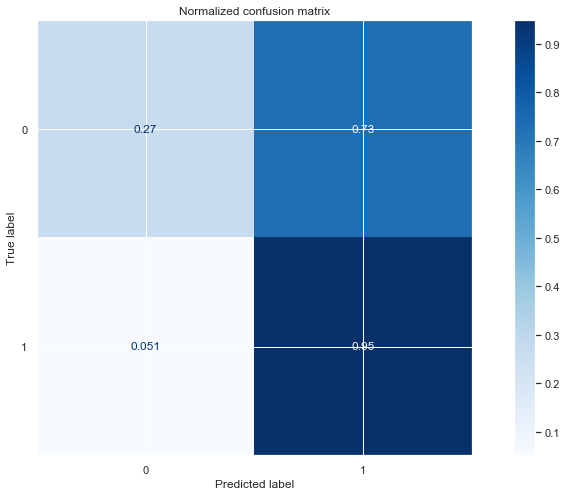

In [393]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mfit, x_test, y_test,
                                 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [394]:
print(metrics.classification_report(y_test, yhat,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.68      0.27      0.38        86
           1       0.76      0.95      0.85       214

    accuracy                           0.75       300
   macro avg       0.72      0.61      0.61       300
weighted avg       0.74      0.75      0.71       300



In [395]:
def plot_roc_curve(model):
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize = (10,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

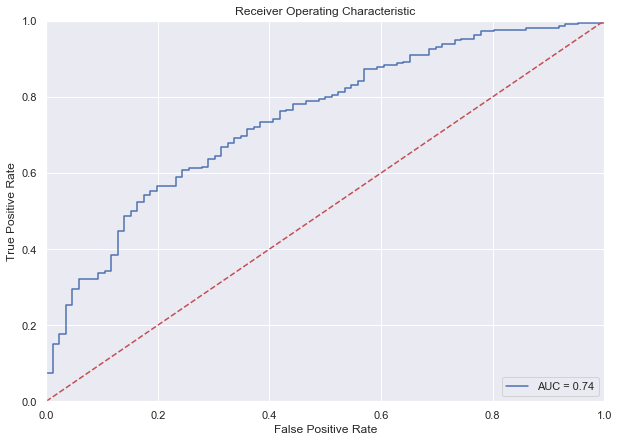

In [396]:
plot_roc_curve(mfit)